## Загрузим нужные библиотеки

In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/Чемпионаты/Карелия/train_dataset_train.csv")
df_sample_solution = pd.read_csv("/content/drive/MyDrive/Чемпионаты/Карелия/sample_solution.csv")

df_named = pd.read_csv("/content/drive/MyDrive/Чемпионаты/Карелия/named.csv")
df_type_contract = pd.read_csv("/content/drive/MyDrive/Чемпионаты/Карелия/type_contract.csv")
df_log = pd.read_csv("/content/drive/MyDrive/Чемпионаты/Карелия/log.csv")

## Рассмотрим датасет поближе

In [ ]:
df_sample_solution

,contract_id,blocked
0,3453,0
1,3454,0
2,3455,0
3,3456,0
4,3457,0
...,...,...
805,4258,0
806,4259,0
807,4260,0
808,4261,0


In [ ]:
df_train

,contract_id,blocked
0,7780,0
1,7785,0
2,7794,0
3,7795,0
4,7798,0
...,...,...
5987,274601,1
5988,274710,1
5989,274782,1
5990,274786,1


In [ ]:
df_named

,date,url,contract_id
0,17-Apr-2021,webmail.sampo.ru,101397
1,17-Apr-2021,webmail.sampo.ru,179624
2,17-Apr-2021,tvip-provision.sampo.ru,190335
3,17-Apr-2021,tvip-provision.sampo.ru,61670
4,17-Apr-2021,tvip-provision.sampo.ru,39370
...,...,...,...
10646532,01-Apr-2021,_sip._udp.048056.16.rt.ru,164026
10646533,01-Apr-2021,048056.16.rt.ru,133945
10646534,01-Apr-2021,camera.rt.ru,67986
10646535,01-Apr-2021,camera.rt.ru,31576


In [ ]:
df_type_contract

,contract_id,day_or_month_contract
0,7780,0
1,3996,0
2,7785,0
3,7794,0
4,7795,1
...,...,...
6800,3503,1
6801,3589,0
6802,4261,0
6803,4118,1


In [ ]:
df_type_contract['day_or_month_contract'].value_counts()

0    4022
1    2783
Name: day_or_month_contract, dtype: int64

In [ ]:
df_log

,contract_id,event_date,event_type
0,36294,2021-03-28 16:24:30,Добавление в Обращались с номеров
1,36294,2021-03-28 16:27:41,Обращение в службу заботы о клиентах
2,36294,2021-03-28 16:29:56,Выключение IPTV-пакета
3,36294,2021-03-28 16:29:56,Включение IPTV-пакета
4,36294,2021-03-28 16:35:04,Обращение в службу заботы о клиентах
...,...,...,...
25269,11801,2021-04-29 07:50:44,Информер ВК. Показ
25270,54405,2021-03-17 10:38:42,Информер ВК. Показ
25271,54405,2021-03-23 08:21:29,Информер ВК. Показ
25272,54405,2021-04-09 13:04:26,Информер ВК. Показ


In [ ]:
list(df_log.event_type.unique())

Узнаем размерность наборов

In [ ]:
print("df_train", df_train.shape)
print("df_named", df_named.shape)
print("df_sample_solution", df_sample_solution.shape)
print("df_type_contract", df_type_contract.shape)
print("df_log", df_log.shape)

df_train (5992, 2)
df_named (10646537, 3)
df_sample_solution (810, 2)
df_type_contract (6805, 2)
df_log (25274, 3)


In [ ]:
#проверим баланс классов (дисбаланс - 88,35% это 0 класс)
df_train['blocked'].value_counts()

0    5294
1     698
Name: blocked, dtype: int64

Пробовала поискать зависимость blocked от запросов пользователей. Времени не хватило поразбираться

In [ ]:
#выделим contract_id, у которых blocked=1
#df_blocked = df_train.loc[df_train["blocked"] == 1]
#df_blocked = df_blocked[['contract_id', 'blocked']]
#df_blocked

In [ ]:
#проверим, на сколько уникальны типы обращений пользователей blocked=1
#df_log['event_type'].value_counts()

In [ ]:
#посмотрим, какие обращения были у пользователей, у которых blocked=1
#df_event_type = pd.merge(df_log, df_blocked, on="contract_id", how='left')
#df_event_type = df_event_type.loc[df_event_type["blocked"] == 1]
#df_event_type['event_type'].value_counts()

In [ ]:
#list(df_event_type.event_type.unique())

In [ ]:
#count_event_type = df_log.groupby("event_type").count()

In [ ]:
#sorted_event_type = count_event_type.sort_values(by='event_date', ascending=False)
#sorted_event_type.head(20)

### Видоизмение данных

Обьединим два набора с данными

In [ ]:
df_train = pd.merge(df_train, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_train.head(3)

,contract_id,blocked,day_or_month_contract
0,7780,0,0.0
1,7785,0,0.0
2,7794,0,0.0


In [ ]:
#то же самое с тестовой выборкой
df_sample_solution = pd.merge(df_sample_solution, df_type_contract , on="contract_id", how='left').drop_duplicates(subset="contract_id")
df_sample_solution.head(3)

,contract_id,blocked,day_or_month_contract
0,3453,0,0
1,3454,0,1
2,3455,0,1


Добавим столбец - колличество обращений человека

In [ ]:
count_log = df_log.groupby("contract_id").count()

count_log.head(3)

,event_date,event_type
contract_id,,
3453,1,1
3454,1,1
3456,4,4


In [ ]:
df_train = pd.merge(df_train, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)

In [ ]:
df_train.head(3)

,contract_id,blocked,day_or_month_contract,event_date
0,7780,0,0.0,9.0
1,7785,0,0.0,1.0
2,7794,0,0.0,NaN


In [ ]:
#то же самое с тестовой выборкой
df_sample_solution = pd.merge(df_sample_solution, count_log , on="contract_id", how='left').drop(["event_type"],axis =1)
df_sample_solution.head(3)

,contract_id,blocked,day_or_month_contract,event_date
0,3453,0,0,1.0
1,3454,0,1,1.0
2,3455,0,1,NaN


Добавим столбец с колличеством днс-запросов к доменам конкурентов

In [ ]:
#для проверки
df_named_1 = df_named.loc[df_named["contract_id"] == 3460] 
df_named_1

,date,url,contract_id
1071128,28-Mar-2021,file.sampo.ru,3460
1071129,28-Mar-2021,file.sampo.ru,3460
1071662,28-Mar-2021,file.sampo.ru,3460
1071663,28-Mar-2021,file.sampo.ru,3460
1071664,28-Mar-2021,profile.sampo.ru,3460
1071665,28-Mar-2021,profile.sampo.ru,3460
1071944,28-Mar-2021,vhod.sampo.ru,3460
1071945,28-Mar-2021,vhod.sampo.ru,3460
1342714,31-Mar-2021,file.sampo.ru,3460
1342715,31-Mar-2021,file.sampo.ru,3460


In [ ]:
count_url = df_named.groupby("contract_id").count()
#count_url = df_named.groupby('contract_id')['date'].agg(['max', 'count'])
#count_url['max'] = pd.to_datetime(count_url['max']).dt.date
#count_url["last_request"] = pd.to_numeric(count_url["max"].str.replace(":", "")).astype(int)
#df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month_name().str.slice(stop=3)
#count_url['max'].date.dt.strftime('%Y,%m,%d').strftime('%j')
#count_url['max']=datetime.datetime.strptime('2018-12-31','%Y-%m-%d').strftime('%j')
#count_url.rename(columns = {'max' : 'last_request', 'count' : 'requests'}, inplace = True) 
count_url.head(5)

,date,url
contract_id,,
3455,24,24
3458,1,1
3459,2,2
3460,10,10
3461,1,1


In [ ]:
df_train_new = pd.merge(df_train, count_url , on="contract_id", how='left').drop(["date"],axis =1)

In [ ]:
df_train_new

,contract_id,blocked,day_or_month_contract,event_date,url
0,7780,0,0.0,9.0,83.0
1,7785,0,0.0,1.0,10.0
2,7794,0,0.0,NaN,NaN
3,7795,0,1.0,7.0,NaN
4,7798,0,0.0,3.0,NaN
...,...,...,...,...,...
5987,274601,1,1.0,6.0,NaN
5988,274710,1,0.0,7.0,NaN
5989,274782,1,0.0,8.0,NaN
5990,274786,1,1.0,9.0,1.0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5990 non-null   float64
 3   event_date             3809 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 234.1 KB


In [ ]:
#то же самое с тестовой выборкой
df_sample_solution_new = pd.merge(df_sample_solution, count_url , on="contract_id", how='left').drop(["date"],axis =1)
df_sample_solution_new.head(3)

,contract_id,blocked,day_or_month_contract,event_date,url
0,3453,0,0,1.0,NaN
1,3454,0,1,1.0,NaN
2,3455,0,1,NaN,24.0


Заменим пропуски на нули

In [ ]:
df_train_new = df_train_new.fillna(0)

In [ ]:
df_train_new.head(5)

,contract_id,blocked,day_or_month_contract,event_date,url
0,7780,0,0.0,9.0,83.0
1,7785,0,0.0,1.0,10.0
2,7794,0,0.0,0.0,0.0
3,7795,0,1.0,7.0,0.0
4,7798,0,0.0,3.0,0.0


In [ ]:
df_sample_solution_new = df_sample_solution_new.fillna(0)
df_sample_solution_new.head(5)

,contract_id,blocked,day_or_month_contract,event_date,url
0,3453,0,0,1.0,0.0
1,3454,0,1,1.0,0.0
2,3455,0,1,0.0,24.0
3,3456,0,0,4.0,0.0
4,3457,0,0,4.0,0.0


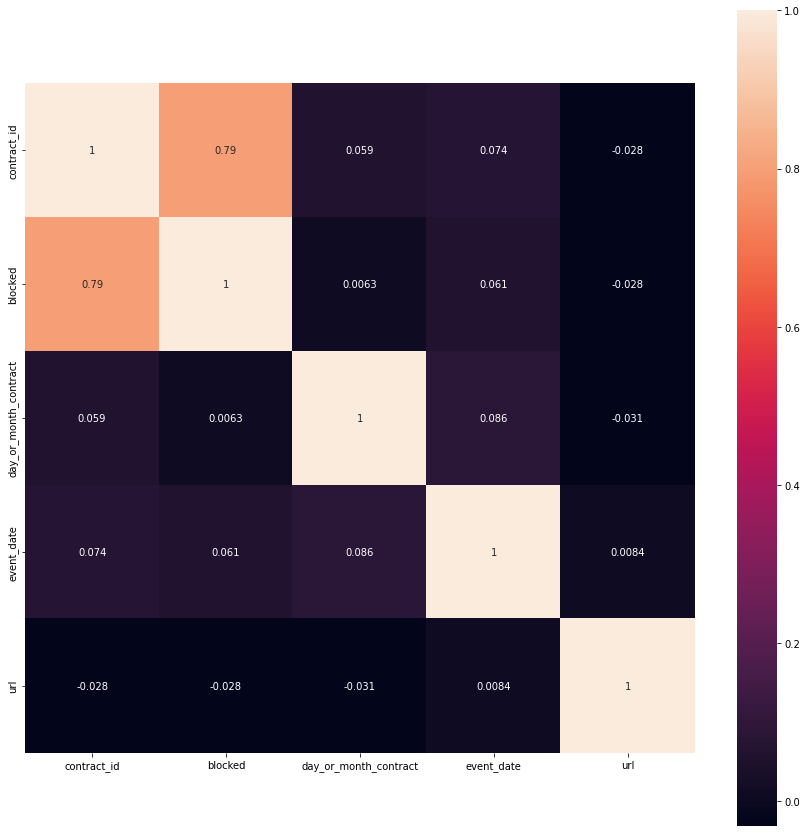

In [ ]:
plt.rcParams['figure.figsize']=(15,15)

corr = df_train_new.corr()
g = sns.heatmap(corr, square = True, annot=True)

In [ ]:
df_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5992 entries, 0 to 5991
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            5992 non-null   int64  
 1   blocked                5992 non-null   int64  
 2   day_or_month_contract  5992 non-null   float64
 3   event_date             5992 non-null   float64
 4   url                    5992 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 280.9 KB


## Выделим выборки

In [ ]:
X = df_train_new.drop(["blocked"], axis = 1)
y = df_train_new[["blocked"]]

In [ ]:
#сбалансируем классы
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0, k_neighbors=10)

column = X.columns

print("До балансировки данных")
print(X.shape)
print(y.value_counts())

os_data_X, os_data_y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=os_data_X, columns=column)
os_data_y = pd.DataFrame(data=os_data_y, columns=['blocked'])

print("После балансировки")
print(os_data_X.shape)
print(os_data_y.value_counts())

До балансировки данных
(5992, 4)
blocked
0          5294
1           698
dtype: int64
После балансировки
(10588, 4)
blocked
0          5294
1          5294
dtype: int64


In [ ]:
os_data_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10588 entries, 0 to 10587
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   contract_id            10588 non-null  int64  
 1   day_or_month_contract  10588 non-null  float64
 2   event_date             10588 non-null  float64
 3   url                    10588 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 331.0 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(7411, 4)
(3177, 4)


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Обучение модели

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

Сравниваем модели, подбираем гиперпараметры

In [ ]:
#подбираем гиперпараметры для случайного леса
%%time
param_grid_forest = { 'n_estimators': [10, 50, 100, 200, 500],
              'max_depth': [5, 10, 15, 20, 30],
              'min_samples_leaf': [1, 5, 10],
              'min_samples_split': [1, 5, 10]}
forest_cv_gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_forest, cv = 5, scoring = 'balanced_accuracy', n_jobs = -1)
best_model_forest= forest_cv_gs.fit(X_train, y_train)
print(best_model_forest.best_params_)
print("Средняя точность измерений:", best_model_forest.best_score_) #{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
#Средняя точность измерений: 0.9737964065191967

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
375 fits failed out of a total of 1125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
375 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/

{'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Средняя точность измерений: 0.9737964065191967
CPU times: user 11 s, sys: 797 ms, total: 11.8 s
Wall time: 8min 13s


In [ ]:
#подбираем гиперпараметры для дерева решений
%%time
param_grid_tree = {'max_depth': range(1,12),
                   'max_features': [1, 2, 3, 4]}
tree_cv_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_tree, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose=True)
#n_jobs – это число одновременно запускаемых процессов поиска. -1 значит, что задействуется все процессоры
best_model_tree_cv= tree_cv_gs.fit(X_train, y_train)
print(best_model_tree_cv.best_params_)
print("Средняя точность измерений:", best_model_tree_cv.best_score_) # лучшие гиперпараметры {'max_depth': 1, 'max_features': 1}
Средняя точность измерений: 0.9515463917525773

In [ ]:
#подбираем гиперпараметры для град.бустинга
%%time
param_grid_tree = { 'n_estimators': [10, 50, 100, 200, 500],
                   'max_depth': [5, 10, 15, 20, 30],
                   'min_samples_leaf': [1, 5]}
boosting_cv_gs = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_tree, cv = 5, scoring = 'balanced_accuracy', n_jobs = -1)
best_model_boosting_cv= boosting_cv_gs.fit(X_train, y_train)
print(best_model_boosting_cv.best_params_)
print("Средняя точность измерений:", best_model_boosting_cv.best_score_) # лучшие гиперпараметры {'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 50}
#Средняя точность измерений: 0.9519034651401895

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'max_depth': 15, 'min_samples_leaf': 5, 'n_estimators': 50}
Средняя точность измерений: 0.9519034651401895
CPU times: user 3.61 s, sys: 241 ms, total: 3.85 s
Wall time: 4min 48s


In [ ]:
#обучаем град.бустинг с лучшими параметрами
%%time
boosting_best = GradientBoostingClassifier(n_estimators=50, max_depth=15, min_samples_leaf= 5, random_state=42) 
boosting_best.fit(X_train, y_train) #обучим модель на тренировочных данных

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 812 ms, sys: 0 ns, total: 812 ms
Wall time: 818 ms


GradientBoostingClassifier(max_depth=15, min_samples_leaf=5, n_estimators=50,
                           random_state=42)

In [ ]:
#обучаем случайный лес с лучшими параметрами
%%time
forest_best = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_leaf=1, min_samples_split=5, random_state=42) #случайный лес
forest_best.fit(X_train, y_train) #обучим модель на тренировочных данных

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


CPU times: user 1.25 s, sys: 4.05 ms, total: 1.26 s
Wall time: 1.26 s


RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=200,
                       random_state=42)

In [ ]:
#Посчитаем accuracy, precision, Recall модели
print("Accuracy:" accuracy_score(y_test, forest_best.predict(X_test))
print("Precision:" precision_score(y_test, forest_best.predict(X_test)) 
print("Recall:" recall_score(y_test, forest_best.predict(X_test))    
   
# Precision - точность (доля объектов, названных классификатором положительными и при этом действительно являющимися положительными)
# Recall - полнота (какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм)

SyntaxError: ignored

In [ ]:
from sklearn.metrics import recall_score
y_1 = boosting_best.predict(X_test)
print("Recall score:", recall_score(y_test, y_1, average='macro'))

Recall score: 0.9484960234593682


In [ ]:
df_sample_solution_new

,contract_id,day_or_month_contract,event_date,url
0,3453,0,1.0,0.0
1,3454,1,1.0,0.0
2,3455,1,0.0,24.0
3,3456,0,4.0,0.0
4,3457,0,4.0,0.0
...,...,...,...,...
805,4258,1,3.0,0.0
806,4259,1,0.0,484.0
807,4260,0,3.0,9.0
808,4261,0,18.0,0.0


In [ ]:
# предсказание ответов для тестовой выборки
df_sample_solution_new = df_sample_solution_new.drop(["blocked"], axis = 1)
y_pred_test = boosting_best.predict(df_sample_solution_new)
print("Recall score:", recall_score(y_test, y_1, average='macro'))

Recall score: 0.9484960234593682


In [ ]:
y_pred_test

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['blocked'])
#y_pred_test = y_pred_test.reset_index()
y_pred_test

,blocked
0,0
1,0
2,0
3,0
4,0
...,...
805,0
806,0
807,0
808,0


In [ ]:
list(y_pred_test.blocked.unique())

[0]

In [ ]:
# Загрузка файлов с локального компьютера в облачное хранилище Colab
from google.colab import files

In [ ]:
y_pred_test.to_csv("submission.csv", index=False)
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_sample_solution_new['blocked'] = y_pred_test['blocked']
df_sample_solution_new = df_sample_solution_new.drop(columns=['day_or_month_contract', 'event_date', 'url'], axis=1)
df_sample_solution_new

,contract_id,blocked
0,3453,0
1,3454,0
2,3455,0
3,3456,0
4,3457,0
...,...,...
805,4258,0
806,4259,0
807,4260,0
808,4261,0


In [ ]:
df_sample_solution_new.to_csv("sample_solution.csv", index=False)
files.download("sample_solution.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>